In [5]:
# Kis szoras
pos_reads = [5,6,7]

# Nagy szoras -> ABDB jobb kene, hogy legyen
#pos_reads = [1,5,14]

# local reads
x=max(pos_reads)

# remote reads
def get_remote_reads(x):
    return sum(pos_reads)-x

def abdb(x):
    return 0.6*x + 5.6*get_remote_reads(x)

def redis(x):
    return 0.3*x + 5.3*get_remote_reads(x)

# Placement-beli különbségek

## Diszkrét eset

<AxesSubplot:xlabel='redis_x', ylabel='total_latency'>

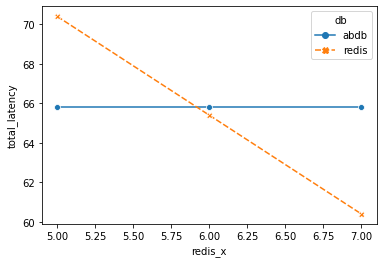

In [6]:
import pandas as pd
import seaborn as sns

best_abdb_x = max(pos_reads)
 
# Create DataFrame
df = pd.DataFrame({})

for x in pos_reads:
    df = df.append({'redis_x':x, 'total_latency':abdb(best_abdb_x), 'db':"abdb"}, ignore_index=True)
    df = df.append({'redis_x':x, 'total_latency':redis(x), 'db':"redis"}, ignore_index=True)
    
    
sns.lineplot(data=df, x="redis_x", y="total_latency", hue='db', style="db", markers=True, dashes=True)

## Folytonos eset

<AxesSubplot:xlabel='time', ylabel='latency'>

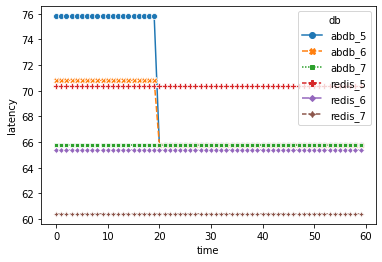

In [7]:
best_abdb_x = max(pos_reads)

def abdb_cont(abdb_worst_x, t, K):
    if t<K:
        return 0.6*abdb_worst_x+5.6*get_remote_reads(abdb_worst_x)
    else:
        return 0.6*best_abdb_x+5.6*get_remote_reads(best_abdb_x)
    
def redis_cont(x, t, K):
    return redis(x)
    

# Create DataFrame
df = pd.DataFrame({})

K = 20

for t in range(60):
    for x in pos_reads:
        df = df.append({'time':t, 'latency':abdb_cont(x, t, K), 'db':"abdb_{}".format(x)}, ignore_index=True)

for x in pos_reads:
    for t in range(60):
        df = df.append({'time':t, 'latency':redis_cont(x, t, K), 'db':"redis_{}".format(x)}, ignore_index=True)

sns.lineplot(data=df, x="time", y="latency", hue='db', style="db", markers=True, dashes=True)
        

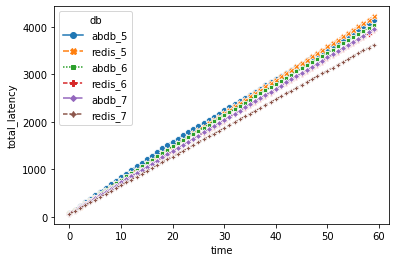

In [8]:
pd.options.plotting.backend = "plotly"

df2 = pd.DataFrame({})
df3 = pd.DataFrame({})
total_abdb_latency = 0
total_redis_latency = 0

values = {}

for x in pos_reads:
    values["abdb_{}".format(x)] = []
    values["redis_{}".format(x)] = []
    for t in range(60):
        total_abdb_latency += abdb_cont(x, t, K)
        total_redis_latency += redis_cont(x, t, K)
        
        df2 = df2.append({'time':t, 'total_latency':total_abdb_latency, 'db':"abdb_{}".format(x)}, ignore_index=True)
        values["abdb_{}".format(x)].append(total_abdb_latency)
        
        df2 = df2.append({'time':t, 'total_latency':total_redis_latency, 'db':"redis_{}".format(x)}, ignore_index=True)
        values["redis_{}".format(x)].append(total_redis_latency)
    
    total_abdb_latency=0
    total_redis_latency = 0

sns.lineplot(data=df2, x="time", y="total_latency", hue='db', style="db", markers=True, dashes=True)

df3 = pd.DataFrame(values)
#print(df3)

fig = df3.plot(title="", template="simple_white",
              labels=dict(index="time", value="total_latency", variable="options"))
#fig.update_yaxes(tickprefix="$")
fig.show()